In [31]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
%matplotlib inline

In [32]:
start = datetime.datetime(2006, 1, 1)
end = datetime.datetime(2016, 1, 1)

In [3]:
BAC = data.DataReader("BAC", 'yahoo', start, end)
C = data.DataReader("C", 'yahoo', start, end)
GS = data.DataReader("GS", 'yahoo', start, end)
JPM = data.DataReader("JPM", 'yahoo', start, end)
MS = data.DataReader("MS", 'yahoo', start, end)
WFC = data.DataReader("WFC", 'yahoo', start, end)

In [28]:
BAC.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2006-01-03,47.180000,46.150002,46.919998,47.080002,16296700.0,36.147552
2006-01-04,47.240002,46.450001,47.000000,46.580002,17757900.0,35.763645
2006-01-05,46.830002,46.320000,46.580002,46.639999,14970700.0,35.809727
2006-01-06,46.910000,46.349998,46.799999,46.570000,12599800.0,35.755962
2006-01-09,46.970001,46.360001,46.720001,46.599998,15619400.0,35.779007


In [5]:
tickers = ['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']

In [6]:
tickers

['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']

In [7]:
bank_stocks = pd.concat([BAC,C,GS,JPM,MS,WFC],axis=1,keys=tickers)

In [9]:
bank_stocks.columns.names = ['Bank Ticker', 'Stock Info']

In [10]:
bank_stocks.head()

Bank Ticker        BAC                                               \
Stock Info        High        Low       Open      Close      Volume   
Date                                                                  
2006-01-03   47.180000  46.150002  46.919998  47.080002  16296700.0   
2006-01-04   47.240002  46.450001  47.000000  46.580002  17757900.0   
2006-01-05   46.830002  46.320000  46.580002  46.639999  14970700.0   
2006-01-06   46.910000  46.349998  46.799999  46.570000  12599800.0   
2006-01-09   46.970001  46.360001  46.720001  46.599998  15619400.0   

Bank Ticker                      C                                      \
Stock Info   Adj Close        High         Low        Open       Close   
Date                                                                     
2006-01-03   36.147552  493.799988  481.100006  490.000000  492.899994   
2006-01-04   35.763645  491.000000  483.500000  488.600006  483.799988   
2006-01-05   35.809727  487.799988  484.000000  484.399994  486.200012   
2006-01-06   35.755962  489.000000  482.000000  488.799988  486.200012   
2006-01-09   35.779007  487.399994  483.000000  486.000000  483.899994   

Bank Ticker    ...             MS                                         WFC  \
Stock Info     ...           Open      Close     Volume  Adj Close       High   
Date           ...                                                              
2006-01-03     ...      57.169998  58.310001  5377000.0  38.834549  31.975000   
2006-01-04     ...      58.700001  58.349998  7977800.0  38.861198  31.820000   
2006-01-05     ...      58.549999  58.509998  5778000.0  38.967754  31.555000   
2006-01-06     ...      58.770000  58.570000  6889800.0  39.007713  31.775000   
2006-01-09     ...      58.630001  59.189999  4144500.0  39.420616  31.825001   

Bank Ticker                                                          
Stock Info         Low       Open      Close      Volume  Adj Close  
Date                                                                 
2006-01-03   31.195000  31.600000  31.900000  11016400.0  21.693670  
2006-01-04   31.365000  31.799999  31.530001  10870000.0  21.442055  
2006-01-05   31.309999  31.500000  31.495001  10158000.0  21.418251  
2006-01-06   31.385000  31.580000  31.680000   8403800.0  21.544062  
2006-01-09   31.555000  31.674999  31.674999   5619600.0  21.540665  

[5 rows x 36 columns]

In [11]:
tickers

['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']

In [15]:
bank_stocks['BAC']['Close'].max()

54.900001525878906

In [16]:
for ticker in tickers:
    print(ticker, ' ',bank_stocks[ticker]['Close'].max())

BAC   54.900001525878906
C   564.0999755859375
GS   247.9199981689453
JPM   70.08000183105469
MS   89.30000305175781
WFC   58.52000045776367


In [36]:
bank_stocks.xs(key='Close', axis=1, level='Stock Info').max()

Bank Ticker
BAC     54.900002
C      564.099976
GS     247.919998
JPM     70.080002
MS      89.300003
WFC     58.520000
dtype: float64

In [23]:
returns = pd.DataFrame()

In [25]:
for ticker in tickers:
    returns[ticker + " Return"] = bank_stocks[ticker]['Close'].pct_change()

In [27]:
returns.head()

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.001110
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005874
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,-0.000158


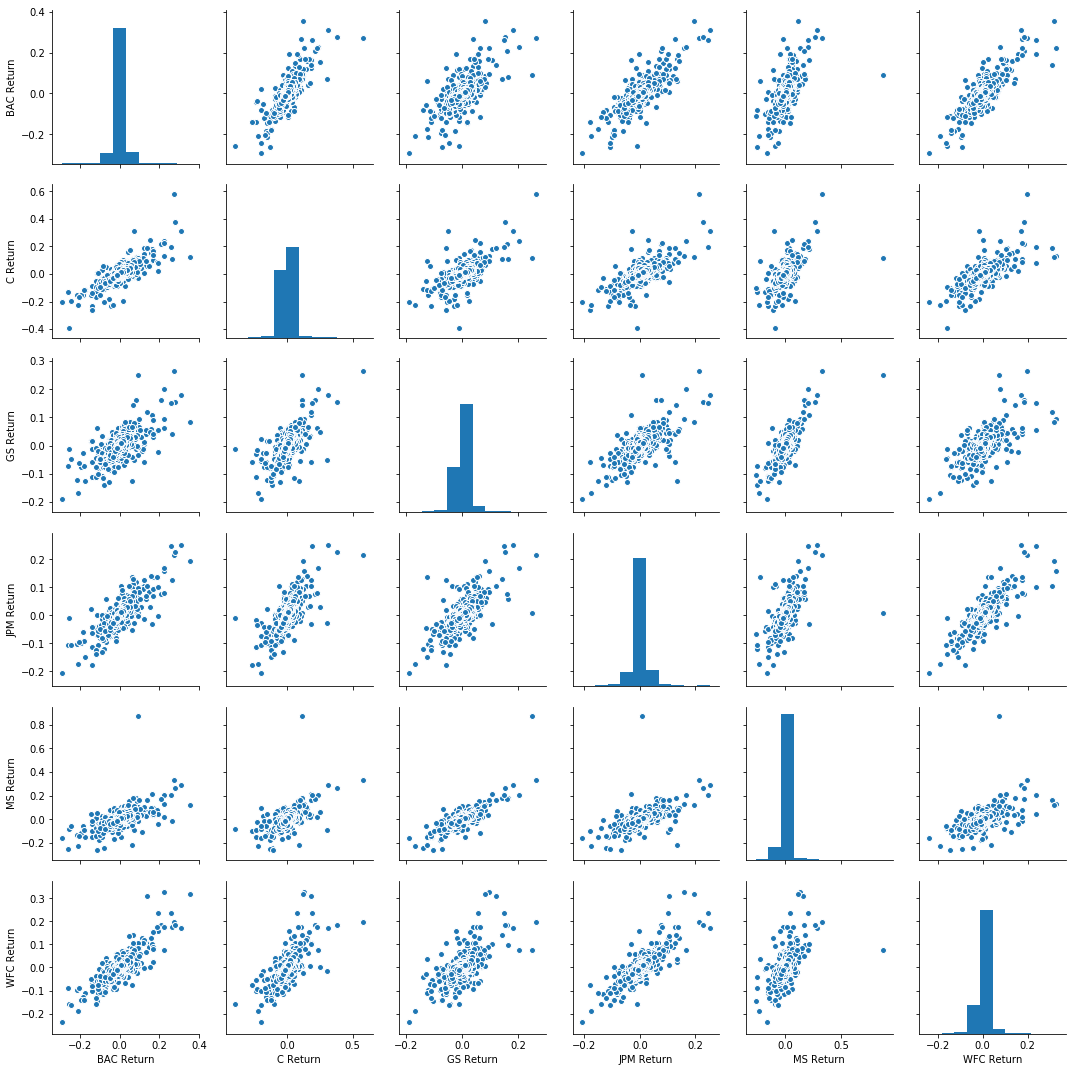

In [34]:
sns.pairplot(returns[1:])